<a href="https://colab.research.google.com/github/Colonel-sketch/Heart-Attack-Risk/blob/Colab/Heart-Attack-Risk%20/h/Proj_1_and_2_and_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Correlation between life factors and the chance of a heart attack**




# 1. Problem statement:





When analysing the data from the hear.csv, I wondered if there is a correlation between common heart attack factors and various factors of life, like age, sex, and fasting glucose. So the problem would be to determine whether or not people or more susceptible to heart attacks due to their lifestyle/born attributes and be able to warn and help treat them early.


##**Problem Relevancy**

The reason why a model predicting the likelihood of heart attacks in patients might be useful is both a patient and business issue. In the case of patients and their relevant caregivers, it is that it allows them to know the risk before an accident and arrange lifestyle choices to accommodate the health issue for the patient. This might look like taking on a healthier diet or meditating to manage stress. For a caregiver or nurse it might look like prescribing heart medication or a lifestyle plan. In the case of businesses, it allows them to analyze the population as a whole and allows them to decide if the medication they are producing will affect certain groups of people. For example, if you create a medication that has an increased side effect rate among people who have heart issues, the model would help predict who you are unlikely to market to.

# **1.1 Objective**

To use common factors that lead to heart attacks, such as high blood pressure and high cholesterol. This would be considered Classification because I want to determine if an age, sex or low cholesterol group is at low risk of a heart attack or high risk. This is unsupervised learning because I won't know who will have a heart attack, but rather to find a likely susceptible group. I chose this because I don't know who will/has had a heart attack, so I think it's more important to analyse the data more generally rather than on a more individual level.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
file_path = '/content/drive/MyDrive/Project1/heart-disease-dataset.zip'
df = pd.read_csv(file_path)
df = df.dropna() # Drop rows with any missing values
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 1.2 Cholesterol V Bodily Factors

Cholesterol is a fat-like substance that is transported by blood through the body. It helps with cell membrane formation, Hormone production and Digestion when in healthy amounts. Cholesterol reaches a potentially dangerous level when it reaches 240mg/dl. This can lead to heart disease as well as increase the likelihood that you will suffer from a heart attack, so it is a good indicator of what might cause heart attacks.

Key:
Blue dot/graph is the relationship in data between a variable and cholesterol levels

Red dots: points of data that exceed the 240 mg/dl amount

*(fig1.1,1.2,1.3,1.4)

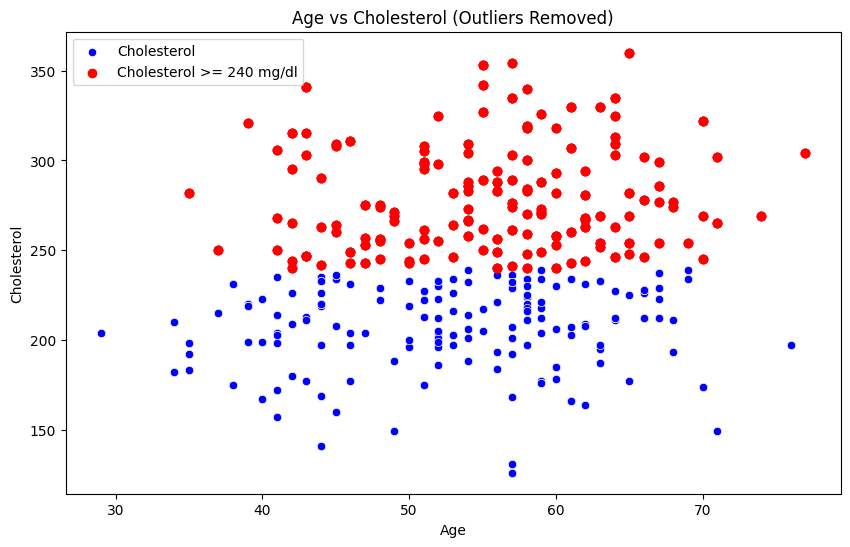

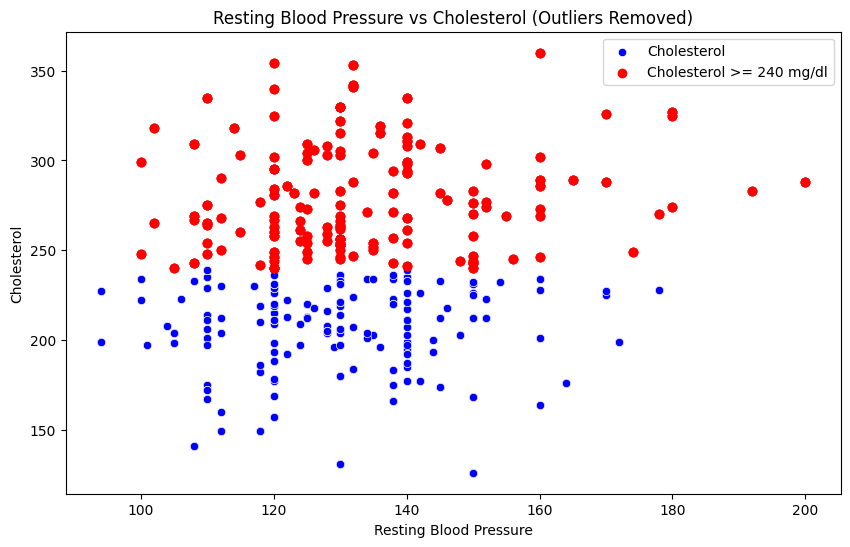

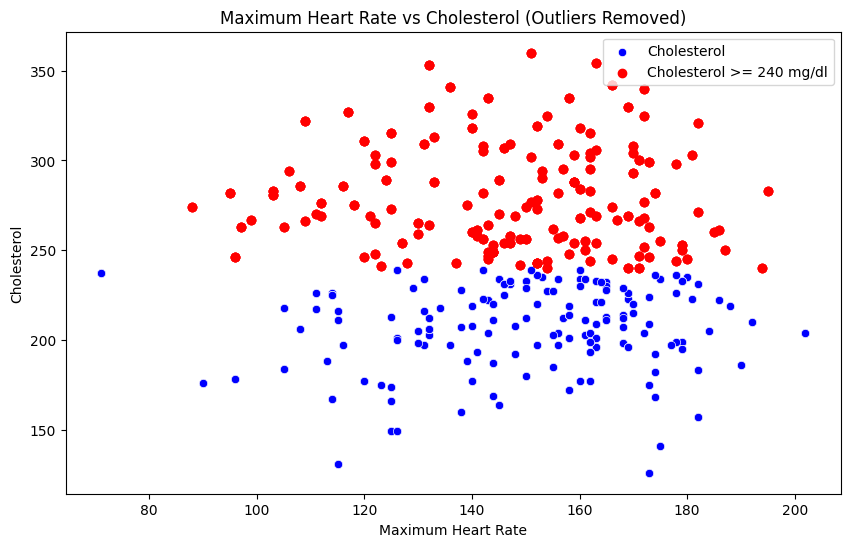

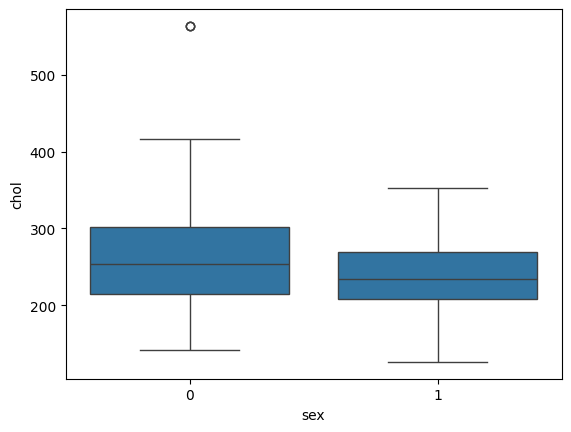

In [ ]:
#@title Fig-1.1,1.2,1.3,1.4
import matplotlib.pyplot as plt
import seaborn as sns

Q1_chol = df['chol'].quantile(0.25)
Q3_chol = df['chol'].quantile(0.75)
IQR_chol = Q3_chol - Q1_chol

lower_bound_chol = Q1_chol - 1.5 * IQR_chol
upper_bound_chol = Q3_chol + 1.5 * IQR_chol

df_no_chol_outliers = df[(df['chol'] >= lower_bound_chol) & (df['chol'] <= upper_bound_chol)]

highlight_condition_chol_no_outliers = (df_no_chol_outliers['chol'] >= 240)

# Plot 1: Age vs Cholesterol (with outliers removed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_chol_outliers, x='age', y='chol', label='Cholesterol', color='blue')
plt.scatter(
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'age'],
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'chol'],
    color='red',
    label='Cholesterol >= 240 mg/dl'
)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol (Outliers Removed)')
plt.legend()
plt.show()

# Plot 2: Resting Blood Pressure vs Cholesterol (with outliers removed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_chol_outliers, x='trestbps', y='chol', label='Cholesterol', color='blue')
plt.scatter(
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'trestbps'],
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'chol'],
    color='red',
    label='Cholesterol >= 240 mg/dl'
)
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Cholesterol')
plt.title('Resting Blood Pressure vs Cholesterol (Outliers Removed)')
plt.legend()
plt.show()

# Plot 3: Maximum Heart Rate vs Cholesterol (with outliers removed)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_chol_outliers, x='thalach', y='chol', label='Cholesterol', color='blue')
plt.scatter(
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'thalach'],
    df_no_chol_outliers.loc[highlight_condition_chol_no_outliers, 'chol'],
    color='red',
    label='Cholesterol >= 240 mg/dl'
)


plt.xlabel('Maximum Heart Rate')
plt.ylabel('Cholesterol')
plt.title('Maximum Heart Rate vs Cholesterol (Outliers Removed)')
plt.legend()
plt.show()
sns.boxplot(data = df, x = 'sex', y = 'chol')
plt.show()




# Blood Pressure v Bodily Factors

Blood pressure is the pressure exerted by your blood against the walls of your arteries. It begins to reach 130 mm/Hg, leading to hypertension and an increased chance of a heart attack, so along with cholesterol, it's a great indicator to determine if someone is likely to have one.

orange dots: the data of the blood pressure in comparison to another variable
red: are the points above the 130 mm/Hg line

*(fig2.1,2.2,2.3,2.4)

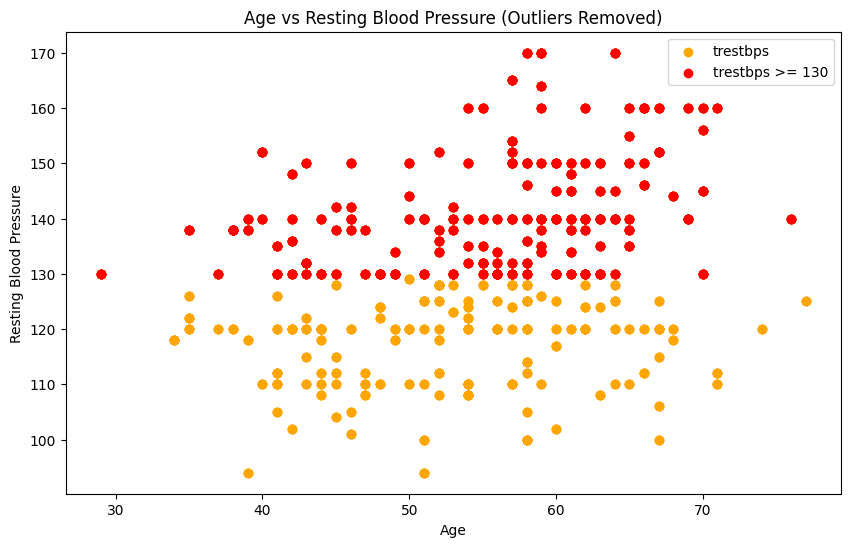

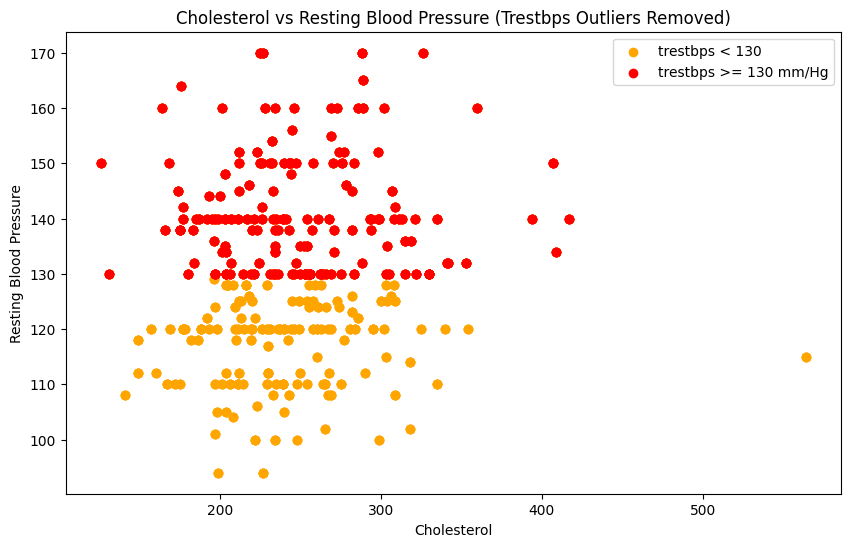

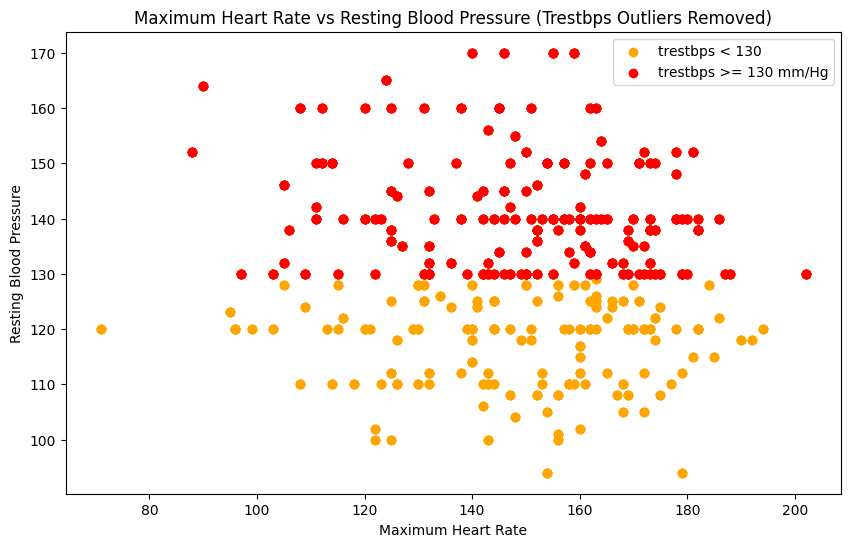

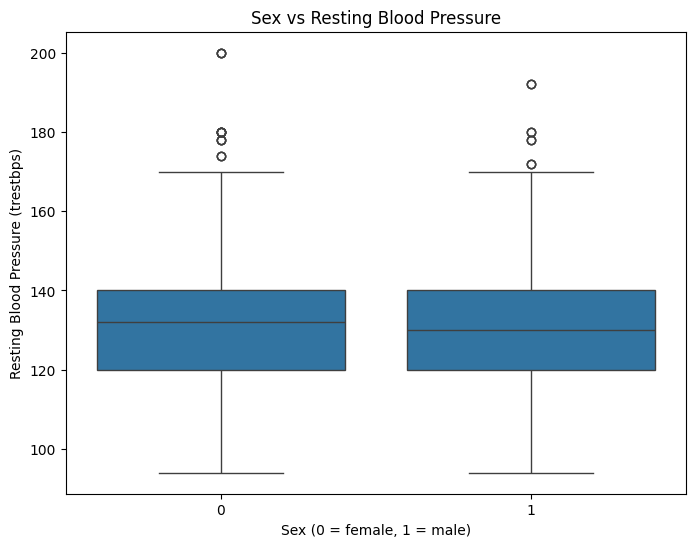

In [ ]:
#@title Fig-2.1,2.2,2.3,2.4

import matplotlib.pyplot as plt
import seaborn as sns

Q1_trestbps = df['trestbps'].quantile(0.25)
Q3_trestbps = df['trestbps'].quantile(0.75)
IQR_trestbps = Q3_trestbps - Q1_trestbps

lower_bound_trestbps = Q1_trestbps - 1.5 * IQR_trestbps
upper_bound_trestbps = Q3_trestbps + 1.5 * IQR_trestbps

df_no_outliers = df[(df['trestbps'] >= lower_bound_trestbps) & (df['trestbps'] <= upper_bound_trestbps)]

highlight_condition_no_outliers = (df_no_outliers['trestbps'] >= 130)

plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['age'], df_no_outliers['trestbps'], color='orange', label='trestbps')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs Resting Blood Pressure (Outliers Removed)')

plt.scatter(
    df_no_outliers.loc[highlight_condition_no_outliers, 'age'],
    df_no_outliers.loc[highlight_condition_no_outliers, 'trestbps'],
    color='red',
    label='trestbps >= 130'
)
plt.legend()
plt.show()

# Plot 2: Cholesterol vs Resting Blood Pressure
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['chol'], df_no_outliers['trestbps'], color='orange', label='trestbps < 130')
plt.xlabel('Cholesterol')
plt.ylabel('Resting Blood Pressure')
plt.title('Cholesterol vs Resting Blood Pressure (Trestbps Outliers Removed)')
plt.scatter(
    df_no_outliers.loc[highlight_condition_no_outliers, 'chol'],
    df_no_outliers.loc[highlight_condition_no_outliers, 'trestbps'],
    color='red',
    label='trestbps >= 130 mm/Hg'
)
plt.legend()
plt.show()

# Plot 3: Maximum Heart Rate vs Resting Blood Pressure
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['thalach'], df_no_outliers['trestbps'], color='orange', label='trestbps < 130')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Resting Blood Pressure')
plt.title('Maximum Heart Rate vs Resting Blood Pressure (Trestbps Outliers Removed)')
plt.scatter(
    df_no_outliers.loc[highlight_condition_no_outliers, 'thalach'],
    df_no_outliers.loc[highlight_condition_no_outliers, 'trestbps'],
    color='red',
    label='trestbps >= 130 mm/Hg'
)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='trestbps')
plt.title('Sex vs Resting Blood Pressure')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()

# Combining models

Blue points: the correlation of cholesterol against the variable

Orange points: the correlation between blood pressure and the variable

Green points: the points above 130mm/Hb

Purple points: the points 240mg/dl

*fig (3.1,3.2,3.3)

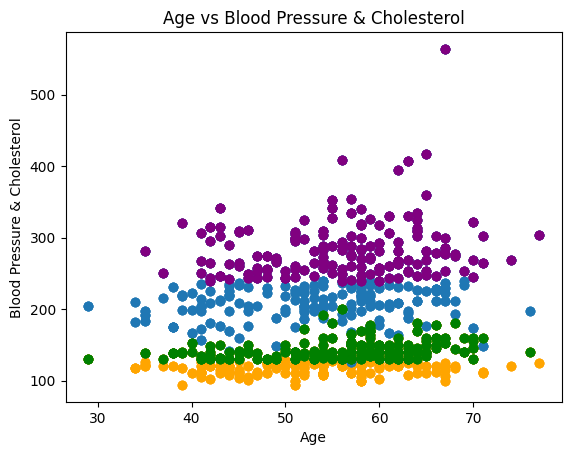

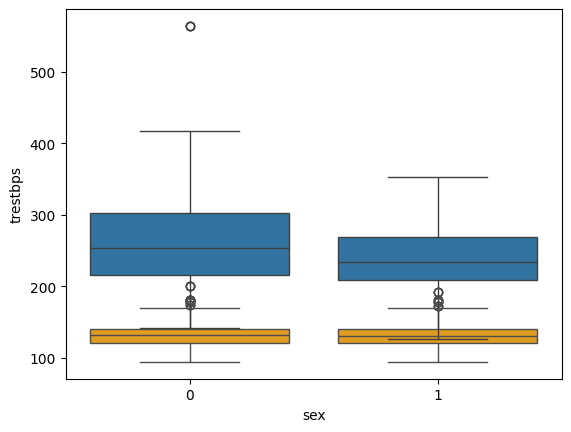

Text(0.5, 1.0, 'Maximum Heart Rate vs Blood Pressure & Cholesterol')

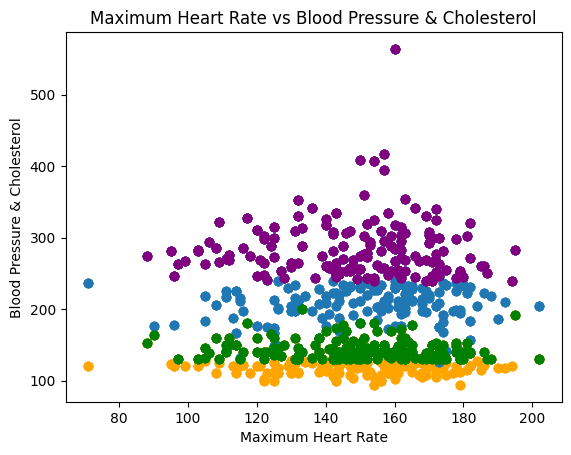

In [ ]:
#@title Fig-3.1,3.2,3.3
plt.scatter(df['age'], df['trestbps'], color = 'orange')
plt.xlabel('Age')
plt.ylabel('Blood Pressure & Cholesterol')
plt.title('Age vs Blood Pressure & Cholesterol')
plt.scatter(df['age'], df['chol'])
highlight_condition = (df['trestbps'] >=130)
plt.scatter(df.loc[highlight_condition, 'age'], df.loc[highlight_condition, 'trestbps'], color='green')
highlight_condition = (df['chol'] >=240)
plt.scatter(df.loc[highlight_condition, 'age'], df.loc[highlight_condition, 'chol'], color='purple')
plt.show()

sns.boxplot(data = df, x = 'sex', y = 'trestbps', color = 'orange')
sns.boxplot(data = df, x = 'sex', y = 'chol')
plt.show()

plt.scatter(df['thalach'], df['trestbps'], color = 'orange')
plt.scatter(df['thalach'], df['chol'])
highlight_condition = (df['trestbps'] >=130)
plt.scatter(df.loc[highlight_condition, 'thalach'], df.loc[highlight_condition, 'trestbps'], color='green')
highlight_condition = (df['chol'] >=240)
plt.scatter(df.loc[highlight_condition, 'thalach'], df.loc[highlight_condition, 'chol'], color='purple')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Blood Pressure & Cholesterol')
plt.title('Maximum Heart Rate vs Blood Pressure & Cholesterol')

# 2. Data Analysis


##2.1 Data Quality Assessment

For the missing values, I dropped all of them when introducing them at the beginning, and for the outliers, I used IQR because a lot of the data isn't necessarily uniform, so I thought it would serve them better. This allows the data to remain uniform and consistent, so when it is used in the models later it is a more accurate representation of the populace.

##2.2 Data Types and Transformations

In model 3.1, you can see that the data for blood pressure accumulates in the 55-65 range. This is similar to the Cholesterol data, which is also concentrated on that range, meaning that cholesterol and blood pressure rise alongside age, reaching their height near retirement age. Although there doesn't seem to be any direct correlation between sex and Blood pressure, in Figure 1.2, Cholesterol does seem to be higher in males, with not only the bulk of the data being on average higher than females the outliers are higher as well.
In Figure 3.3 max heart range is between 140 and 160, which is consistent with people in their 50s is where cholesterol and blood pressure are mostly organized. For the type of data I used Numerical to illistrate the overall dynamic between different factors and Blood pressure and cholesterall, for transformations I haven't done any yet but will do that in part three to modify it for a classification model. In terms of dependencies as the age of the patient rises the heart rate decreases meaning if age is important to detecting high blood pressure and cholestral then maximum heart rate is not because they do not correlate at least at the moment, and it tends to be the case that women often have smaller hearts meaning their heart rate is on average higher which also worsens the likelyhood of heartrate being important because men seem to have similar or high blood pressure/cholesterol. Although in three I will test if this stays true in the model.

##Feature Engineering and Regression Choice

In terms of feature engineering, there will have to be a combination of both blood pressure and cholesterol values into a new variable. This is because there are likely many cases where both overlap, so creating a new category not only allows the models to predict the first two but the likelihood that both occur at the same time allowing for higher interpretability when looking at the result, and allowing the models to have a higher level of function. The reason I chose logistic regression as my regression choice is its stability. It is unlikely that I will have a high number of predictors in my model, so I want to be able to maintain an accurate result even in that situation. Also, because it is simplistic, it won't likely lead to overfitting in cases of small amounts of data. The reason this is important to me is that if you want to train the model based on data actively collected post the acceptance of the model, it is better to not overfit when the data amount is low.

# Conclusion

According to the data, the people most likely to suffer from a heart attack are males in the age range of 55–65. This coincides with the age range of retirement leading to stress for retirement, as well as slowly increasing health issues such as the lowering down of the body and pre-diabetes. Meaning that in step three, when the models are trained, the most important impacts will likely consist of heartrate and age. Although limited in scope in terms of predictors, it will help to narrow down the amount of data affects, so I will train a logistic regression and KNN model based on these predictors to determine their accuracy. To determine the effects of each category, I will train a random tree model with all categories to find if including each category has a change to the overall prediction quality in comparison to the KNN model.

#3. Model Training and Test/Training split

##3.1 Model Type and Traing 3 models

The reason why I chose a classification model is because, while in an individual's case it is important to measure overall blood pressure and cholesterol even at high-risk milestones, I think overall it is easier to interpret and analyze the data if it is split into categories based on whether the data meets the high-risk milestone being able to determine who is likely and warn them rather than having to do rigorous testing for each person. Also, when creating a model for the data, the thing that the model will hopefully extract is who is likely to suffer from a heart attack, not a trend of overall increase aka the overall split is important, not the linear increase.



In [ ]:
# splitting the blood pressure data where they cross 130
df['testbps01'] = np.where(df['trestbps'] >= 130, 1, 0)

# splitting the cholesterol into 240 high/low
df['chol01'] = np.where(df['chol'] > 240, 1, 0)

#splitting the data where both cholesterol is over 240 and blood pressure is over 130
df['combrisk01'] = np.where((df['chol01'] == 1) & (df['testbps01'] == 1), 1, 0)

Here I created new categories to simplify my data so that is why the model has to come to a prediction. It is easier to decide if the person has a likelihood of a heart attack.



In [ ]:
#@title Model 1 Age and sex
X = df[['age', 'sex']]
y = df['combrisk01']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Initialize a KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_resampled, y_resampled)

# Make predictions on the original test set
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]


In [ ]:
#@title Model 2 Age and Heart Rate

X_model2 = df[['age', 'thalach']]
y_model2 = df['combrisk01']

X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42, stratify=y_model2)

sm_model2 = SMOTE(random_state=42)
X_resampled_model2, y_resampled_model2 = sm_model2.fit_resample(X_train_model2, y_train_model2)

knn_model2 = KNeighborsClassifier(n_neighbors=5)
knn_model2.fit(X_resampled_model2, y_resampled_model2)

y_pred_knn2 = knn_model2.predict(X_test_model2)
y_proba_knn2 = knn_model2.predict_proba(X_test_model2)[:, 1]

In [ ]:
#@title Model 3 Sex and Heart Rate
X_model3 = df[['sex', 'thalach']]
y_model3 = df['combrisk01']

X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(X_model3, y_model3, test_size=0.2, random_state=42, stratify=y_model3)

sm_model3 = SMOTE(random_state=42)
X_resampled_model3, y_resampled_model3 = sm_model3.fit_resample(X_train_model3, y_train_model3)

knn_model3 = KNeighborsClassifier(n_neighbors=5)
knn_model3.fit(X_resampled_model3, y_resampled_model3)

y_pred_knn3 = knn_model3.predict(X_test_model3)
y_proba_knn3 = knn_model3.predict_proba(X_test_model3)[:, 1]


KNN Model 1 (Age, Sex) Metrics:
      Metric   Value
0   Accuracy  0.7122
1  Precision  0.5200
2     Recall  0.4262
3   F1-Score  0.4685
4    ROC AUC  0.7250
5     PR AUC  0.6016

KNN Model 2 (Age, Thalach) Metrics:
      Metric   Value
0   Accuracy  0.7659
1  Precision  0.5670
2     Recall  0.9016
3   F1-Score  0.6962
4    ROC AUC  0.9247
5     PR AUC  0.8789

KNN Model 3 (Sex, Thalach) Metrics:
      Metric   Value
0   Accuracy  0.7122
1  Precision  0.5156
2     Recall  0.5410
3   F1-Score  0.5280
4    ROC AUC  0.7690
5     PR AUC  0.5679


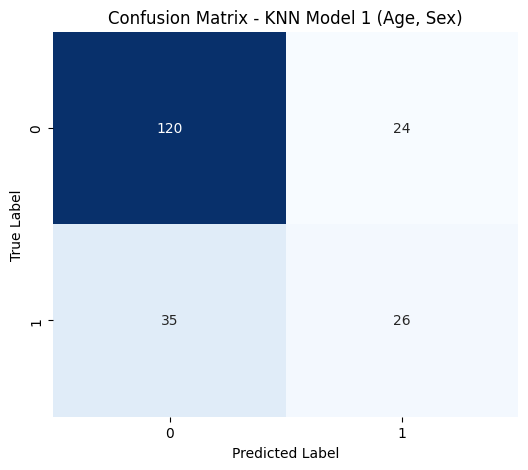

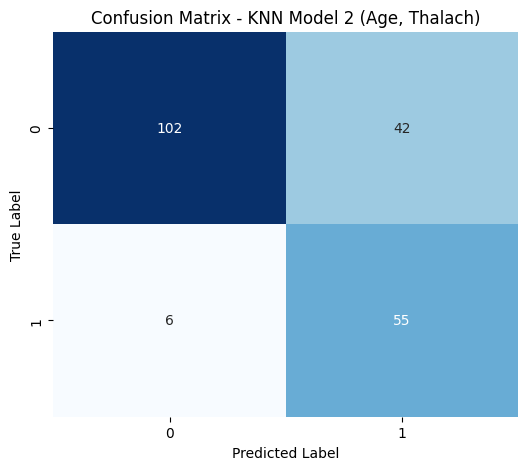

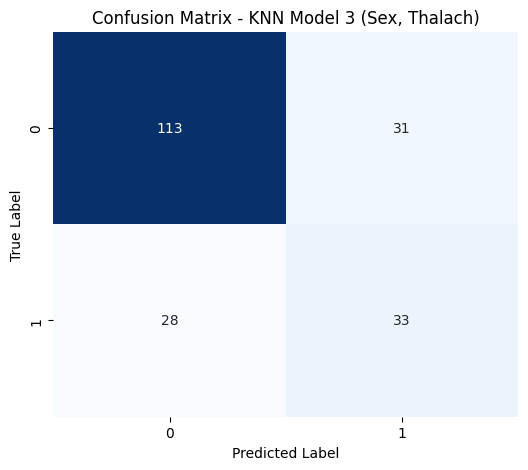

In [ ]:
#@title Performance metrics

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, zero_division=0)
recall_knn = recall_score(y_test, y_pred_knn, zero_division=0)
f1_knn = f1_score(y_test, y_pred_knn, zero_division=0)
roc_auc_knn = roc_auc_score(y_test, y_proba_knn)

# Calculate PR AUC for Model 1
pr_precision_knn_curve, pr_recall_knn_curve, _ = precision_recall_curve(y_test, y_proba_knn)
pr_auc_knn = auc(pr_recall_knn_curve, pr_precision_knn_curve)

# Create DataFrame for KNN Model 1 metrics
metrics_knn1 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Value': [accuracy_knn, precision_knn, recall_knn, f1_knn, roc_auc_knn, pr_auc_knn]
})
print("\nKNN Model 1 (Age, Sex) Metrics:")
print(metrics_knn1.round(4))

accuracy_knn2 = accuracy_score(y_test_model2, y_pred_knn2)
precision_knn2 = precision_score(y_test_model2, y_pred_knn2, zero_division=0)
recall_knn2 = recall_score(y_test_model2, y_pred_knn2, zero_division=0)
f1_knn2 = f1_score(y_test_model2, y_pred_knn2, zero_division=0)
roc_auc_knn2 = roc_auc_score(y_test_model2, y_proba_knn2)

# Calculate PR AUC for Model 2
pr_precision_knn_curve2, pr_recall_knn_curve2, _ = precision_recall_curve(y_test_model2, y_proba_knn2)
pr_auc_knn2 = auc(pr_recall_knn_curve2, pr_precision_knn_curve2)

# Create DataFrame for KNN Model 2 metrics
metrics_knn2 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Value': [accuracy_knn2, precision_knn2, recall_knn2, f1_knn2, roc_auc_knn2, pr_auc_knn2]
})
print("\nKNN Model 2 (Age, Thalach) Metrics:")
print(metrics_knn2.round(4))

accuracy_knn3 = accuracy_score(y_test_model3, y_pred_knn3)
precision_knn3 = precision_score(y_test_model3, y_pred_knn3, zero_division=0)
recall_knn3 = recall_score(y_test_model3, y_pred_knn3, zero_division=0)
f1_knn3 = f1_score(y_test_model3, y_pred_knn3, zero_division=0)
roc_auc_knn3 = roc_auc_score(y_test_model3, y_proba_knn3)

# Calculate PR AUC for Model 3
pr_precision_knn_curve3, pr_recall_knn_curve3, _ = precision_recall_curve(y_test_model3, y_proba_knn3)
pr_auc_knn3 = auc(pr_recall_knn_curve3, pr_precision_knn_curve3)

# Create DataFrame for KNN Model 3 metrics
metrics_knn3 = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Value': [accuracy_knn3, precision_knn3, recall_knn3, f1_knn3, roc_auc_knn3, pr_auc_knn3]
})
print("\nKNN Model 3 (Sex, Thalach) Metrics:")
print(metrics_knn3.round(4))

cm1 = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Model 1 (Age, Sex)')
plt.show()

cm2 = confusion_matrix(y_test_model2, y_pred_knn2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Model 2 (Age, Thalach)')
plt.show()

cm3 = confusion_matrix(y_test_model3, y_pred_knn3)
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN Model 3 (Sex, Thalach)')
plt.show()

##3.1 (cont) KNN Model Evaluation


Out of the three KNN models, the 2nd model is the best. This is true for the…

**Metrics:** First, the accuracy is the highest at .76 or 76%, meaning the model will predict the correct solution 76% of the time, meaning age and heart rate affect the data the most. Then the precision is the highest, at .56 meaning it is the most consistent model compared to the others. It has the highest recall as well, at .90 or 90%, the number of the predicted cases were accurate. The f1 score is also the highest, but this has to be true if precision and recall are the highest as well. The ROC AUC is the highest, meaning that it has a 92% true positive rate, which is close to perfect. Finally, the PR-AUC is the highest, meaning it has the highest precision and recall.

**Domain Justification:** With age, your body grows older, including your arteries and heart, leading to artery damage and lack of exercise due to low energy. This then causes the increased cholesterol which further clogs arteries, requiring the heart to beat faster, which increases the blood pressure. This then further damages the arteries and the cycle repeats, increasing the chance of a heart attack.

Although KNN doesn't have feature importance or a coefficient, it does have k. The reason I chose 5 as my k value is because although K=1 or 2 would have increased my f1 and ROC-AUC scores, it would have overfitted the model, meaning that it would be harder to tell if someone met the 130 and 240 requirements.

This does align with goodness of fit, because although I predicted that age and heart rate would not have affected cholesterol and blood pressure together, it turns out that it does not only show visibly in the charts in part 1 but also in the accuracy of the prediction in part 3.

# 3.1 B. Regularized Model Creation

### Reason for choosing logistic regression

The reason I chose logistic regression specifically, as explained in two, is because there weren't many predictors theorized to have a massive effect on the cholesterol and blood pressure, so there needed to be consistency which logistic regression is good at. This allows me to create the model with most of the predictors and have it function with higher accuracy with missing data. Logistic regression also often does not fall into overfitting, so it is useful in the case that there are low amounts of data **see 4* this also helps cover for KNN where it is prone to overfitting. For the C, the model itself is simple, so the lower C is warranted, punishing more complicated models. The best penalty that the model found was l2 or ridge because the features are highly correlated as demonstrated in 1.

Best C found for Logistic Regression: 0.01
Best penalty found for Logistic Regression: l2

Optimized Regularized Logistic Regression Model Metrics:
      Metric   Value
0   Accuracy  0.8537
1  Precision  0.7013
2     Recall  0.8852
3   F1-Score  0.7826
4    ROC AUC  0.9347
5     PR AUC  0.8514


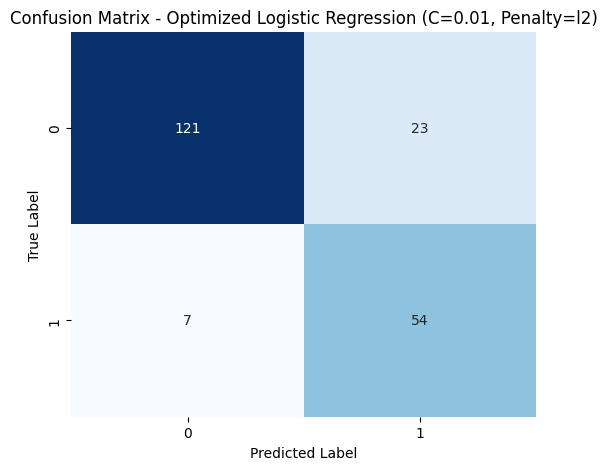

In [ ]:
#@title Training the Logistic Regression Model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='f1', n_jobs=-1)

grid_search_log_reg.fit(X_resampled_all_features_scaled, y_resampled_all_features_scaled)

best_c_log_reg = grid_search_log_reg.best_params_['C']
best_penalty_log_reg = grid_search_log_reg.best_params_['penalty']
print(f"Best C found for Logistic Regression: {best_c_log_reg}")
print(f"Best penalty found for Logistic Regression: {best_penalty_log_reg}")

log_reg_optimized = LogisticRegression(C=best_c_log_reg, penalty=best_penalty_log_reg, solver='liblinear', random_state=42)
log_reg_optimized.fit(X_resampled_all_features_scaled, y_resampled_all_features_scaled)

y_pred_log_reg_optimized = log_reg_optimized.predict(X_test_all_features_scaled)
y_proba_log_reg_optimized = log_reg_optimized.predict_proba(X_test_all_features_scaled)[:, 1]

accuracy_log_reg_optimized = accuracy_score(y_test_all_features, y_pred_log_reg_optimized)
precision_log_reg_optimized = precision_score(y_test_all_features, y_pred_log_reg_optimized, zero_division=0)
recall_log_reg_optimized = recall_score(y_test_all_features, y_pred_log_reg_optimized, zero_division=0)
f1_log_reg_optimized = f1_score(y_test_all_features, y_pred_log_reg_optimized, zero_division=0)
roc_auc_log_reg_optimized = roc_auc_score(y_test_all_features, y_proba_log_reg_optimized)

pr_precision_log_reg_curve, pr_recall_log_reg_curve, _ = precision_recall_curve(y_test_all_features, y_proba_log_reg_optimized)
pr_auc_log_reg_optimized = auc(pr_recall_log_reg_curve, pr_precision_log_reg_curve)

metrics_log_reg_optimized = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Value': [accuracy_log_reg_optimized, precision_log_reg_optimized, recall_log_reg_optimized, f1_log_reg_optimized, roc_auc_log_reg_optimized, pr_auc_log_reg_optimized]
})
print("\nOptimized Regularized Logistic Regression Model Metrics:")
print(metrics_log_reg_optimized.round(4))

cm_log_reg_optimized = confusion_matrix(y_test_all_features, y_pred_log_reg_optimized)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log_reg_optimized, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - Optimized Logistic Regression (C={best_c_log_reg}, Penalty={best_penalty_log_reg})')
plt.show()

# 3.2 5-K Cross Fold For model evaluation

In [ ]:
#@title KNN Cross Fold
X_model2 = df[['age', 'thalach']]
y_model2 = df['combrisk01']

X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(X_model2, y_model2, test_size=0.2, random_state=42, stratify=y_model2)

sm_model2 = SMOTE(random_state=42)
X_resampled_model2, y_resampled_model2 = sm_model2.fit_resample(X_train_model2, y_train_model2)

knn_model2 = KNeighborsClassifier(n_neighbors=5)

knn_model2.fit(X_resampled_model2, y_resampled_model2)

scoring = ['accuracy', 'precision', 'recall', 'f1']
k_folds = 5

print(f"Performing {k_folds}-fold cross-validation for KNN Model 2 (Age, Thalach)...")

accuracy_scores2 = cross_val_score(knn_model2, X_resampled_model2, y_resampled_model2, cv=k_folds, scoring='accuracy', n_jobs=-1)
print(f"Accuracy: Mean = {accuracy_scores2.mean():.4f}, Std = {accuracy_scores2.std():.4f}")

precision_scores2 = cross_val_score(knn_model2, X_resampled_model2, y_resampled_model2, cv=k_folds, scoring='precision', n_jobs=-1)
print(f"Precision: Mean = {precision_scores2.mean():.4f}, Std = {precision_scores2.std():.4f}")

recall_scores2 = cross_val_score(knn_model2, X_resampled_model2, y_resampled_model2, cv=k_folds, scoring='recall', n_jobs=-1)
print(f"Recall: Mean = {recall_scores2.mean():.4f}, Std = {recall_scores2.std():.4f}")

f1_scores2 = cross_val_score(knn_model2, X_resampled_model2, y_resampled_model2, cv=k_folds, scoring='f1', n_jobs=-1)
print(f"F1-Score: Mean = {f1_scores2.mean():.4f}, Std = {f1_scores2.std():.4f}")

Performing 5-fold cross-validation for KNN Model 2 (Age, Thalach)...
Accuracy: Mean = 0.8267, Std = 0.0209
Precision: Mean = 0.7796, Std = 0.0288
Recall: Mean = 0.9134, Std = 0.0094
F1-Score: Mean = 0.8409, Std = 0.0160


In [ ]:
#@title Logistic Regression Cross Fold

X_all_features = df.drop(columns=['target', 'testbps01', 'chol01', 'combrisk01'])
y_all_features = df['combrisk01']

X_train_all_features, X_test_all_features, y_train_all_features, y_test_all_features = train_test_split(X_all_features, y_all_features, test_size=0.2, random_state=42, stratify=y_all_features)

scaler_all_features = StandardScaler()
X_train_all_features_scaled = scaler_all_features.fit_transform(X_train_all_features)
X_test_all_features_scaled = scaler_all_features.transform(X_test_all_features)

sm_all_features = SMOTE(random_state=42)
X_resampled_all_features_scaled, y_resampled_all_features_scaled = sm_all_features.fit_resample(X_train_all_features_scaled, y_train_all_features)

log_reg_optimized = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', random_state=42)

k_folds = 5

print(f"Performing {k_folds}-fold cross-validation for Optimized Logistic Regression...")

accuracy_scores_log_reg = cross_val_score(log_reg_optimized, X_resampled_all_features_scaled, y_resampled_all_features_scaled, cv=k_folds, scoring='accuracy', n_jobs=-1)
print(f"Accuracy: Mean = {accuracy_scores_log_reg.mean():.4f}, Std = {accuracy_scores_log_reg.std():.4f}")

precision_scores_log_reg = cross_val_score(log_reg_optimized, X_resampled_all_features_scaled, y_resampled_all_features_scaled, cv=k_folds, scoring='precision', n_jobs=-1)
print(f"Precision: Mean = {precision_scores_log_reg.mean():.4f}, Std = {precision_scores_log_reg.std():.4f}")

recall_scores_log_reg = cross_val_score(log_reg_optimized, X_resampled_all_features_scaled, y_resampled_all_features_scaled, cv=k_folds, scoring='recall', n_jobs=-1)
print(f"Recall: Mean = {recall_scores_log_reg.mean():.4f}, Std = {recall_scores_log_reg.std():.4f}")

f1_scores_log_reg = cross_val_score(log_reg_optimized, X_resampled_all_features_scaled, y_resampled_all_features_scaled, cv=k_folds, scoring='f1', n_jobs=-1)
print(f"F1-Score: Mean = {f1_scores_log_reg.mean():.4f}, Std = {f1_scores_log_reg.std():.4f}")

Performing 5-fold cross-validation for Optimized Logistic Regression...
Accuracy: Mean = 0.8726, Std = 0.0180
Precision: Mean = 0.8468, Std = 0.0168
Recall: Mean = 0.9099, Std = 0.0231
F1-Score: Mean = 0.8771, Std = 0.0178


##Model Analyses Based on K-Fold Data

Based on the cross-validation results, the Optimized Logistic Regression Model appears to be the most robust. It consistently achieves the highest mean scores for accuracy (0.8726), precision (0.8468), recall (0.9099), and F1 score (0.8771). This model demonstrates strong generalization capabilities and reliable performance in identifying the combined risk of high blood pressure and cholesterol. This proves the effectiveness of the chosen hyperparameters chosen when creating the model, which, in combination with the effectiveness of the overall model, the likelihood is that the logistic regression is a better model for overall in comparison to KNN.



#3.3 Creating a Random Forest Model

In [ ]:
#@title Splitting the Data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train_no_leakage, X_test_no_leakage, y_train_no_leakage, y_test_no_leakage = train_test_split(X_no_leakage, y_no_leakage, test_size=0.2, random_state=42, stratify=y_no_leakage)

scaler_no_leakage = StandardScaler()
X_train_no_leakage_scaled = scaler_no_leakage.fit_transform(X_train_no_leakage)
X_test_no_leakage_scaled = scaler_no_leakage.transform(X_test_no_leakage)

sm_no_leakage = SMOTE(random_state=42)
X_resampled_no_leakage_scaled, y_resampled_no_leakage_scaled = sm_no_leakage.fit_resample(X_train_no_leakage_scaled, y_train_no_leakage)

Best hyperparameters found for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

Optimized Random Forest Model Metrics (No Leakage):
      Metric   Value
0   Accuracy  0.9707
1  Precision  0.9104
2     Recall  1.0000
3   F1-Score  0.9531
4    ROC AUC  0.9949
5     PR AUC  0.9878


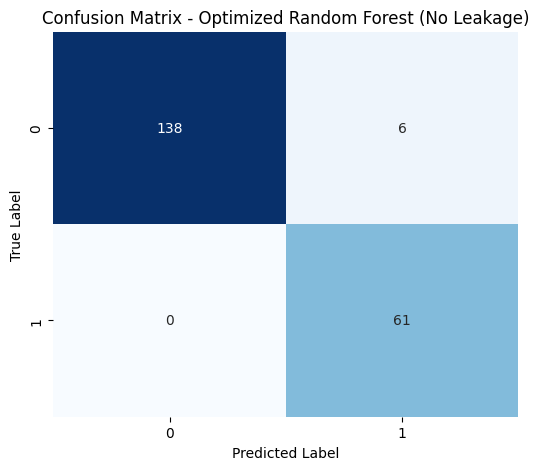

/tmp/ipython-input-62251239.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


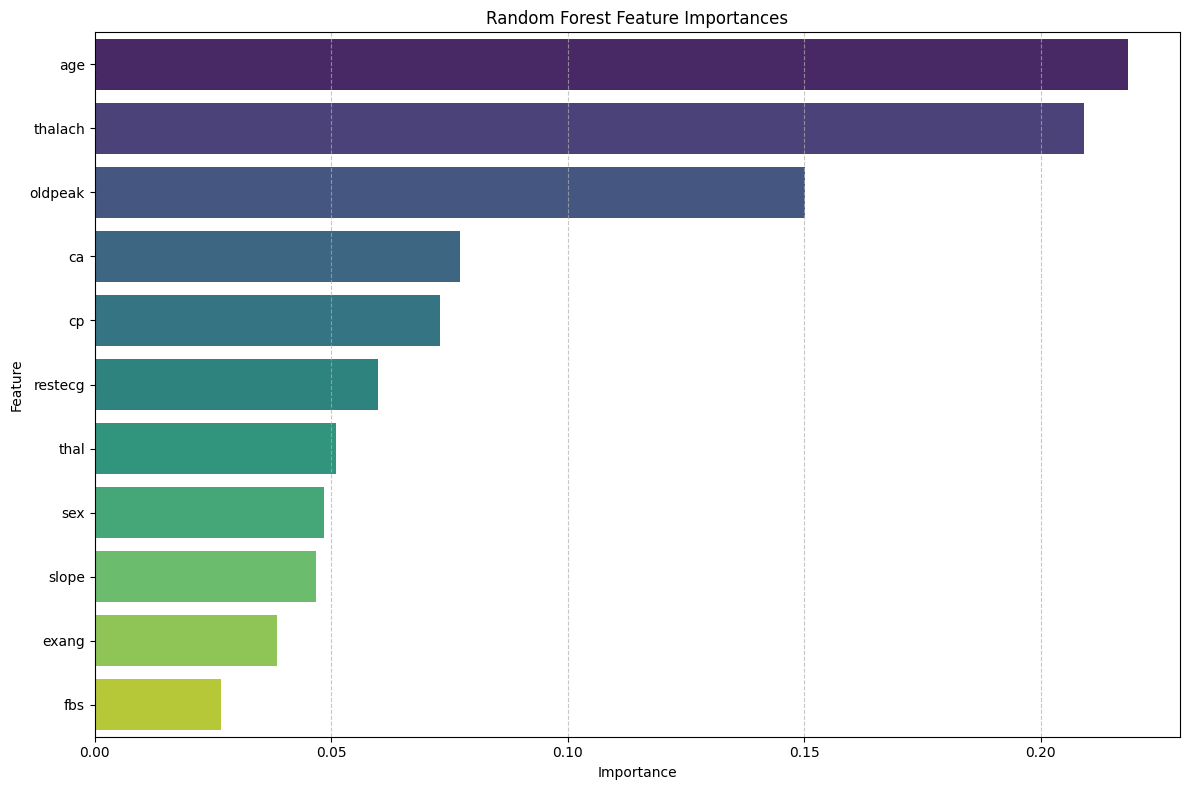

In [ ]:
#@title Training the Model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_resampled_no_leakage_scaled, y_resampled_no_leakage_scaled)

best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters found for Random Forest: {best_params_rf}")

rf_optimized = RandomForestClassifier(**best_params_rf, random_state=42)
rf_optimized.fit(X_resampled_no_leakage_scaled, y_resampled_no_leakage_scaled)

y_pred_rf_no_leakage = rf_optimized.predict(X_test_no_leakage_scaled)
y_proba_rf_no_leakage = rf_optimized.predict_proba(X_test_no_leakage_scaled)[:, 1]

accuracy_rf_no_leakage = accuracy_score(y_test_no_leakage, y_pred_rf_no_leakage)
precision_rf_no_leakage = precision_score(y_test_no_leakage, y_pred_rf_no_leakage, zero_division=0)
recall_rf_no_leakage = recall_score(y_test_no_leakage, y_pred_rf_no_leakage, zero_division=0)
f1_rf_no_leakage = f1_score(y_test_no_leakage, y_pred_rf_no_leakage, zero_division=0)
roc_auc_rf_no_leakage = roc_auc_score(y_test_no_leakage, y_proba_rf_no_leakage)

pr_precision_rf_curve_no_leakage, pr_recall_rf_curve_no_leakage, _ = precision_recall_curve(y_test_no_leakage, y_proba_rf_no_leakage)
pr_auc_rf_no_leakage = auc(pr_recall_rf_curve_no_leakage, pr_precision_rf_curve_no_leakage)

metrics_rf_no_leakage = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'],
    'Value': [accuracy_rf_no_leakage, precision_rf_no_leakage, recall_rf_no_leakage, f1_rf_no_leakage, roc_auc_rf_no_leakage, pr_auc_rf_no_leakage]
})

print("\nOptimized Random Forest Model Metrics (No Leakage):")
print(metrics_rf_no_leakage.round(4))

cm_rf_no_leakage = confusion_matrix(y_test_no_leakage, y_pred_rf_no_leakage)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf_no_leakage, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Optimized Random Forest (No Leakage)')
plt.show()

feature_importances = rf_optimized.feature_importances_

feature_names = X_no_leakage.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##How the Model Works

Random Forest works by taking the columns of data and creating a decision tree out of them. It then runs through the tree finding its overall accuracy based on the categories it used. It then repeats this process with multiple trees finding the trees that have the highest prediction accuracy and voting on whether the result they produce is the likely answer.

**Strengths**

Accuracy:provides excellent predictive accuracy by averaging, increasing the likelihood of reducing variance and overfitting.

Model Type: It's versatile, allowing for both regression and classification problems.

Features: able to identify the most important features.

Simplicity: Handles missing data well and less affected by outliers.

**Weakness**

Interpretability: it is harder to understand why a prediction is made.

Cost: many trees require significant memory and processing power.

Bad for Sparse Data: May perform worse with smaller datasets.

**Use Case**

Random Forest models are best used for higher complexity large data models with unclear feature importance, allowing for clarity and high accuracy when running through the trees.

#**3.4 Comparing Models**

In [ ]:
#@title Quality metric comparison
optimized_comparison_table = full_metrics_comparison_df.pivot(index='Model', columns='Metric', values='Value')
display(optimized_comparison_table.round(4))

Metric,Accuracy,F1-Score,PR AUC,Precision,ROC AUC,Recall
Model,,,,,,
"KNN (Age, Thalach)",0.7659,0.6962,0.8789,0.5670,0.9247,0.9016
Optimized LogReg (All Features),0.8537,0.7826,0.8514,0.7013,0.9347,0.8852
Random Forest (No Leakage),0.9707,0.9531,0.9878,0.9104,0.9949,1.0000


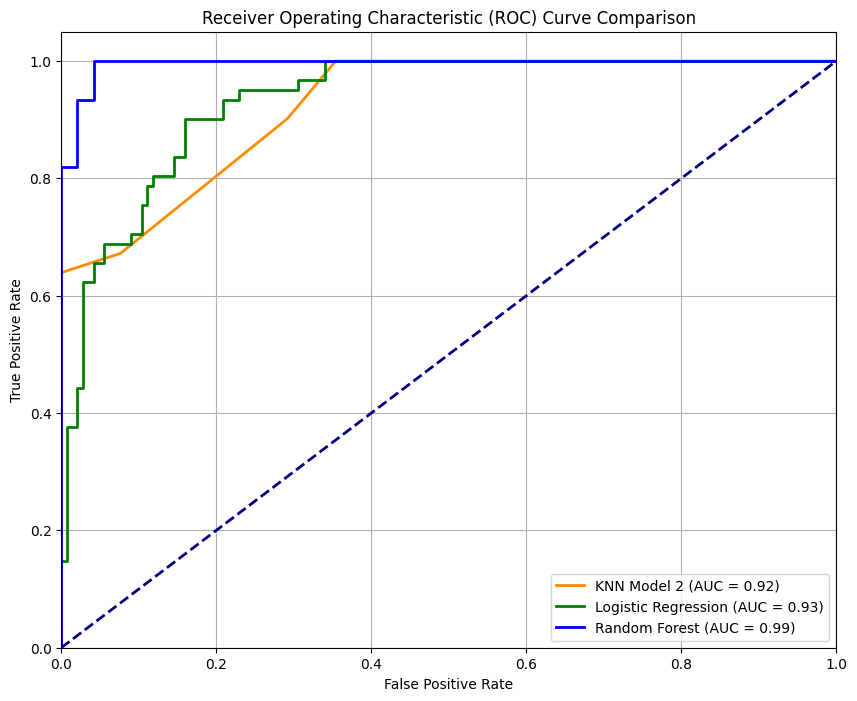


AUC Score for KNN Model 2: 0.9247
AUC Score for Optimized Logistic Regression: 0.9347
AUC Score for Optimized Random Forest: 0.9949


In [ ]:
#@title ROC graph

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_knn2, tpr_knn2, _ = roc_curve(y_test_model2, y_proba_knn2)
roc_auc_knn2_plot = auc(fpr_knn2, tpr_knn2)

fpr_log_reg_optimized, tpr_log_reg_optimized, _ = roc_curve(y_test_all_features, y_proba_log_reg_optimized)
roc_auc_log_reg_optimized_plot = auc(fpr_log_reg_optimized, tpr_log_reg_optimized)

fpr_rf_no_leakage, tpr_rf_no_leakage, _ = roc_curve(y_test_no_leakage, y_proba_rf_no_leakage)
roc_auc_rf_no_leakage_plot = auc(fpr_rf_no_leakage, tpr_rf_no_leakage)

plt.figure(figsize=(10, 8))

plt.plot(fpr_knn2, tpr_knn2, color='darkorange', lw=2, label=f'KNN Model 2 (AUC = {roc_auc_knn2_plot:.2f})')

plt.plot(fpr_log_reg_optimized, tpr_log_reg_optimized, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log_reg_optimized_plot:.2f})')

plt.plot(fpr_rf_no_leakage, tpr_rf_no_leakage, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf_no_leakage_plot:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"\nAUC Score for KNN Model 2: {roc_auc_knn2_plot:.4f}")
print(f"AUC Score for Optimized Logistic Regression: {roc_auc_log_reg_optimized_plot:.4f}")
print(f"AUC Score for Optimized Random Forest: {roc_auc_rf_no_leakage_plot:.4f}")

##"Best" Model

The best model based on large amounts of data is the Random forest model. This is because it has the highest prediction accuracy and doesn't take much data influence. Random forest, through iterating the trees, decides the most important features, allowing you to insert the data directly, making it easy to use in comparison to the KNN, and has a 5% higher accuracy in comparison to the logistic regression which uses the same number of predictors. The one reason you would use logistic regression over random forest is if you don't have much prior data to train the model. For example, if you're in a small clinic and want to use data from your own practice to train your model. In terms of domain relevance, it applies as well, because the simpler-to-implement model is best, because it is unlikely that there is a data scientist on the premesis of a hospital floor, so any easy-to-use model that has high predictions is always best.

##4. Predictions based on made data

In [ ]:
#@title KNN Prediction

#hypothetical data of a nurse entering patient data into my model
new_data = [
    {'age': 45, 'thalach': 180},
    {'age': 60, 'thalach': 120},
    {'age': 50, 'thalach': 150},
    {'age': 70, 'thalach': 130},
    {'age': 35, 'thalach': 190}
]

new_df = pd.DataFrame(new_data)
print("Hypothetical new data for prediction:")
print(new_df)

new_predictions = knn_model2.predict(new_df)
new_probabilities = knn_model2.predict_proba(new_df)[:, 1]

new_df['predicted_combrisk01'] = new_predictions
new_df['prediction_probability'] = new_probabilities

print("Predictions for hypothetical new data:")
print(new_df)

Hypothetical new data for prediction:
   age  thalach
0   45      180
1   60      120
2   50      150
3   70      130
4   35      190
Predictions for hypothetical new data:
   age  thalach  predicted_combrisk01  prediction_probability
0   45      180                     0                     0.0
1   60      120                     1                     0.8
2   50      150                     1                     1.0
3   70      130                     0                     0.0
4   35      190                     0                     0.4


In [ ]:
#@title Logistic Regression Prediction
new_data_log_reg = [
    {'age': 45, 'sex': 1, 'cp': 0, 'trestbps': 120, 'chol': 200, 'fbs': 0, 'restecg': 1, 'thalach': 150, 'exang': 0, 'oldpeak': 0.5, 'slope': 2, 'ca': 0, 'thal': 2},
    {'age': 60, 'sex': 0, 'cp': 1, 'trestbps': 140, 'chol': 280, 'fbs': 1, 'restecg': 0, 'thalach': 120, 'exang': 1, 'oldpeak': 2.0, 'slope': 1, 'ca': 1, 'thal': 3},
    {'age': 55, 'sex': 1, 'cp': 2, 'trestbps': 130, 'chol': 230, 'fbs': 0, 'restecg': 1, 'thalach': 160, 'exang': 0, 'oldpeak': 1.0, 'slope': 2, 'ca': 0, 'thal': 2},
    {'age': 70, 'sex': 1, 'cp': 0, 'trestbps': 160, 'chol': 250, 'fbs': 1, 'restecg': 0, 'thalach': 110, 'exang': 1, 'oldpeak': 3.0, 'slope': 0, 'ca': 2, 'thal': 3}
]

new_df_log_reg = pd.DataFrame(new_data_log_reg)

new_df_log_reg_scaled = scaler_all_features.transform(new_df_log_reg)

new_predictions_log_reg = log_reg_optimized.predict(new_df_log_reg_scaled)
new_probabilities_log_reg = log_reg_optimized.predict_proba(new_df_log_reg_scaled)[:, 1]

new_df_log_reg['predicted_combrisk01'] = new_predictions_log_reg
new_df_log_reg['prediction_probability'] = new_probabilities_log_reg

print("Predictions for hypothetical new data:")
print(new_df_log_reg)

Predictions for hypothetical new data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   45    1   0       120   200    0        1      150      0      0.5      2   
1   60    0   1       140   280    1        0      120      1      2.0      1   
2   55    1   2       130   230    0        1      160      0      1.0      2   
3   70    1   0       160   250    1        0      110      1      3.0      0   

   ca  thal  predicted_combrisk01  prediction_probability  
0   0     2                     0                0.138956  
1   1     3                     1                0.815163  
2   0     2                     0                0.265499  
3   2     3                     1                0.807493  


In [ ]:
#@title Random Forest Prediction
new_data_rf = [
    {'age': 40, 'sex': 0, 'cp': 1, 'fbs': 0, 'restecg': 0, 'thalach': 170, 'exang': 0, 'oldpeak': 0.0, 'slope': 2, 'ca': 0, 'thal': 2},
    {'age': 65, 'sex': 1, 'cp': 2, 'fbs': 1, 'restecg': 1, 'thalach': 130, 'exang': 1, 'oldpeak': 2.5, 'slope': 1, 'ca': 2, 'thal': 3},
    {'age': 50, 'sex': 1, 'cp': 0, 'fbs': 0, 'restecg': 0, 'thalach': 145, 'exang': 0, 'oldpeak': 1.0, 'slope': 2, 'ca': 0, 'thal': 2},
    {'age': 72, 'sex': 0, 'cp': 3, 'fbs': 1, 'restecg': 2, 'thalach': 100, 'exang': 1, 'oldpeak': 3.5, 'slope': 0, 'ca': 3, 'thal': 3}
]

new_df_rf = pd.DataFrame(new_data_rf)
new_df_rf_scaled = scaler_no_leakage.transform(new_df_rf)

new_predictions_rf = rf_optimized.predict(new_df_rf_scaled)
new_probabilities_rf = rf_optimized.predict_proba(new_df_rf_scaled)[:, 1]

new_df_rf['predicted_combrisk01'] = new_predictions_rf
new_df_rf['prediction_probability'] = new_probabilities_rf

print("\nPredictions for hypothetical new data using Random Forest:")
print(new_df_rf)


Predictions for hypothetical new data using Random Forest:
   age  sex  cp  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  \
0   40    0   1    0        0      170      0      0.0      2   0     2   
1   65    1   2    1        1      130      1      2.5      1   2     3   
2   50    1   0    0        0      145      0      1.0      2   0     2   
3   72    0   3    1        2      100      1      3.5      0   3     3   

   predicted_combrisk01  prediction_probability  
0                     0                    0.08  
1                     0                    0.28  
2                     0                    0.31  
3                     0                    0.45  


In this hypothetical, a nurse is entering patient data into my provided models. This then spits back out a prediction if they are likely to have both high blood pressure and cholesterol, which then can allow them to tell their patient that they are at a higher risk of a heart attack and ways to prevent it occuring.

##5.  Interpretation and Final Conclusion

**Data interpretation:** As shown in the KNN model and the Random Forest model, both age and heart rate have the most effect on the predictions, affirming the data analysis done in two. In the case of all models, the increase in age and heart rate increases the combrisk01 likelihood, meaning as you age and have a higher average heart rate your chance of heart attacks is high.


**Goodness of fit:** The overall fit of the data is high, especially in the Logistic regression and Random forest model because it uses all the categories. Even in the case of KNN, where it only uses two predictors and a higher number of neighbors, the prediction value is still rather high, being at 75–80% accuracy, though even using the most influential data points, the models still occasionally misclassify the data.


**Summary:** Overall, as predicted and discussed above, both heart rate and age have a large effect on cholesterol and blood pressure. With the increase in age and heart rate leading to an overall greater risk of heart attacks. One place I was suprised by was that Oldpeak had a decent effect on the data, which is the amount of blood flowing to the heart. In retrospect, this makes sense since, with cholesterol clogging veins, it would lead to less blood flowing to the heart, meaning that Oldpeak likely is caused by cholesterol rather than the other way around.

As seen in both the visual and classification models, both age and heart rate seem to affect the rise in blood pressure and cholesterol. Allowing me to create a model that is able to predict if a person is likely to already have high blood pressure and cholesterol based on age and heart rate. This makes it easier for people in the medical profession to advise certain patients on whether they are likely to get a heart attack, improving the chance of catching cases early rather than too late.

# ** 1.3 Data Source**

The data is named heart.csv and is accesed through Kaggle, it can be accesed here -> [heart.csv](https://www.kaggle.com/datasets/arezaei81/heartcsv/data)

**Extra:**
Since the dataset is popular I took a look at posts on the site under the public section and compared models here is one I took a look at [Example](https://www.kaggle.com/code/sonug2527/heart-disease-prediction-program2) Compared to mine it is rather similar in that we both used classifcation models to predict the frequency of some kind of abnormality with the heart, the difference mostly lies with what we are predicitng with the example predicting heart disease based on heart disease data within the data base, whereas I wanted to use data to predict something outside of the data base. compared to my model his has better accuracy by .08, better precision by .29, worse recall by .05, and a better f1 by .16.